# Описательные статистики для
- торговли
- регрессоров и инструментов


In [20]:
import seaborn as sns
import plotly.express as px
import polars as pl
import numpy as np
sns.set_theme()

### Торговля

In [21]:
trade_df = pl.read_parquet('../data/preprocessed_data/trade_hs0.parquet.gzip')
trade_df = trade_df.with_columns((np.log(pl.col('v')/pl.col('v19'))).alias('log(v/v19)'),
                                 (np.log(pl.col('q')/pl.col('q19'))).alias('log(q/q19)'),
                                 np.log(pl.col('v')).alias('log(v)'),
                                 np.log(pl.col('q')).alias('log(q)'))
trade_df.head()

c:\Users\unstr\Documents\7 семестр работы\Диплом\thesis-repo\thesis\.venv\Lib\site-packages\polars\series\series.py:1484: RuntimeWarning:

divide by zero encountered in log



t,i,j,v,q,v19,q19,log(v/v19),log(q/q19),log(v),log(q)
i16,str,str,f32,f32,f64,f64,f64,f64,f32,f32
2021,"""LUX""","""LBY""",968.018005,210.173019,501.858,127.012,0.656933,0.50365,6.875251,5.347931
2021,"""RUS""","""SEN""",1.3072e6,3131615.5,789625.305,2.2321e6,0.504058,0.338606,14.083371,14.95706
2020,"""SOM""","""KOR""",3136.61084,2045.875977,5608.268,4002.77,-0.581099,-0.671161,8.050899,7.623581
2020,"""TUR""","""CRI""",57792.285156,98850.453125,60858.013,86163.873,-0.051688,0.137357,10.964611,11.501364
2021,"""KNA""","""BIH""",0.52,0.008,0.46,0.005,0.122602,0.470004,-0.653926,-4.828314


In [22]:
trade_df.group_by(["t", "i", "j"]).agg(pl.len().alias("count")).filter(pl.col("count") > 2)

t,i,j,count
i16,str,str,u32


In [42]:
pl.Config(float_precision=2)
trade_df.fill_nan(None).with_columns([
    pl.when(pl.col("log(q/q19)").is_infinite()).then(None).otherwise(pl.col("log(q/q19)")).alias("log(q/q19)"),
    pl.when(pl.col("log(q)").is_infinite()).then(None).otherwise(pl.col("log(q)")).alias("log(q)")
]).describe()

statistic,t,i,j,v,q,v19,q19,log(v/v19),log(q/q19),log(v),log(q)
str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",71789.00,"""71789""","""71789""",71789.00,71789.00,71789.00,71789.00,71789.00,71142.00,71789.00,71366.00
"""null_count""",0.00,"""0""","""0""",0.00,0.00,0.00,0.00,0.00,647.00,0.00,423.00
"""mean""",2020.98,null,null,853820.06,583580.31,755939.92,595709.79,0.07,-0.02,8.20,6.80
"""std""",0.82,null,null,7728133.50,7763680.00,6831421.55,7697997.34,1.04,1.19,4.28,5.10
"""min""",2020.00,"""ABW""","""ABW""",0.00,0.00,0.00,0.00,-14.62,-15.60,-6.91,-6.91
"""25%""",2020.00,null,null,228.44,38.92,215.45,40.60,-0.30,-0.42,5.43,3.75
"""50%""",2021.00,null,null,5152.15,1521.02,4735.00,1551.41,0.06,-0.01,8.55,7.37
"""75%""",2022.00,null,null,81894.51,37546.32,74865.52,37648.08,0.44,0.39,11.31,10.55
"""max""",2022.00,"""ZWE""","""ZWE""",560952256.00,885543936.00,443882954.08,843139246.83,11.38,19.68,20.15,20.60


In [5]:
trade_df.sql('''select t, count(distinct i), count(distinct j) from self group by t;''')

t,i,j
i16,u32,u32
2022,226,226
2020,226,226
2021,226,226


<Axes: xlabel='log(q)', ylabel='log(v)'>

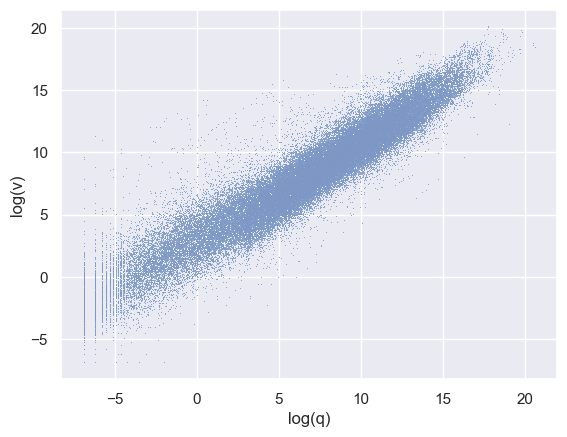

In [19]:
sns.scatterplot(trade_df, x='log(q)', y='log(v)', s=0.5 )

<Axes: xlabel='log(q/q19)', ylabel='log(v/v19)'>

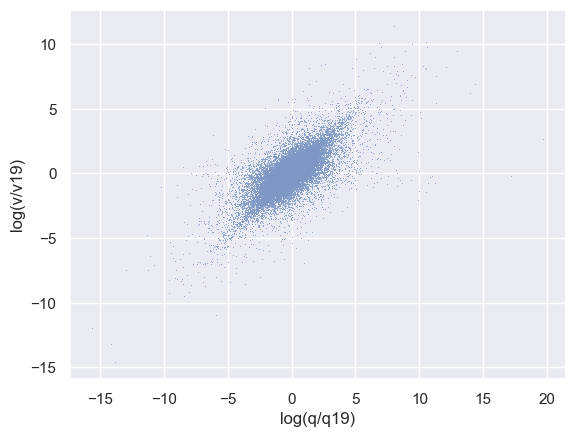

In [7]:
sns.scatterplot(trade_df, x='log(q/q19)', y='log(v/v19)', s=0.5 )

### Регрессоры

In [53]:
regressors_df = pl.read_parquet('../data/preprocessed_data/regressors.parquet.gzip')
regressors_df = regressors_df.with_columns(np.log(pl.col('cases')).alias('log(cases)'),
                                 np.log(pl.col('deaths')).alias('log(deaths)'))
regressors_df.head()

c:\Users\unstr\Documents\7 семестр работы\Диплом\thesis-repo\thesis\.venv\Lib\site-packages\polars\series\series.py:1484: RuntimeWarning:

divide by zero encountered in log



country,t,cases,deaths,tests,C1M_School_closing,C2M_Workplace_closing,C3M_Cancel_public_events,C4M_Restrictions_on_gatherings,C5M_Close_public_transport,C6M_Stay_at_home_requirements,C7M_Restrictions_on_internal_movement,C8EV_International_travel_controls,E1_Income_support,E2_Debt_contract_relief,E3_Fiscal_measures,E4_International_support,H1_Public_information_campaigns,H2_Testing_policy,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,H6M_Facial_Coverings,H7_Vaccination_policy,H8M_Protection_of_elderly_people,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,MajorityVaccinated,PopulationVaccinated,country:temp,t:temp,average_surface_temperature,country:median_age_table,t:median_age_table,median_age,country:SARS_table,SARS_total_cases,country:density_and_mortality,t:density_and_mortality,population_density,female_ratio,maternal_mortality,cvd_mortality,pollution_mortality,poisoning_mortality,hygiene_mortality,female_mortality,male_mortality,infant_mortality,largest_city_share,urbanization,country:household_size,avg_hh_size,share_1_members,share_2_3_members,share_4_5_members,log(cases),log(deaths)
str,i16,f64,f64,str,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,i64,f64,str,i64,f32,str,i64,str,i64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,str,f32,f32,f32,f32,f64,f64
"""SLV""",2020,19.63,0.57,null,2.43,1.43,1.31,2.30,0.83,1.80,1.30,2.71,0.75,1.45,4871233.00,0.00,1.88,0.81,0.63,489863.00,0.00,2.20,0.00,2.05,63.59,53.96,53.82,54.92,0.00,0.00,"""SLV""",2020,26.48,"""SLV""",2020,25.69,null,null,"""SLV""",2020,300.90,52.48,null,null,null,null,null,124.34,293.27,11.00,24.15,17.74,"""SLV""",3.92,8.46,36.01,37.84,2.98,-0.56
"""ASM""",2022,467.62,1.93,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""ASM""",2022,26.57,"""ASM""",2022,27.93,null,null,"""ASM""",2022,241.71,49.46,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,6.15,0.66
"""BOL""",2020,35.13,2.08,null,2.42,1.83,1.53,2.84,1.42,1.51,1.48,2.20,0.75,0.25,3198088.00,0.00,1.61,0.73,0.58,340103.41,0.00,1.90,0.00,1.92,67.20,51.26,54.99,25.14,0.00,0.00,"""BOL""",2020,21.08,"""BOL""",2020,24.02,null,null,"""BOL""",2020,10.91,49.73,null,null,null,null,null,190.71,316.67,21.00,22.42,41.25,"""BOL""",3.53,20.34,34.82,27.64,3.56,0.73
"""SLE""",2020,0.85,0.03,null,1.61,0.23,1.09,1.82,0.34,0.37,0.35,1.77,0.00,0.42,20491.80,0.00,1.49,1.51,1.51,10109.29,0.00,2.08,0.00,1.52,35.85,35.74,39.36,10.45,0.00,0.00,"""SLE""",2020,26.40,"""SLE""",2020,18.60,null,null,"""SLE""",2020,109.62,50.15,null,null,null,null,null,228.95,270.28,80.30,35.39,15.19,"""SLE""",5.29,6.42,20.52,33.28,-0.16,-3.68
"""LKA""",2020,4.97,0.02,null,1.93,0.55,1.03,2.18,0.45,1.54,0.78,2.31,0.00,1.33,2460477.50,370076.50,1.73,1.64,1.80,365565.84,0.00,2.47,0.00,1.43,47.48,46.43,48.32,33.20,0.00,0.00,"""LKA""",2020,26.99,"""LKA""",2020,32.07,null,null,"""LKA""",2020,354.33,51.57,null,null,null,null,null,65.98,152.11,6.00,14.93,null,null,null,null,null,null,1.60,-3.77


In [54]:
regressors_df.group_by(["country", "t"]).agg(pl.len().alias("count")).filter(pl.col("count") > 2)

country,t,count
str,i16,u32


In [55]:
pl.Config(float_precision=2)
regressors_df.describe()

statistic,country,t,cases,deaths,tests,C1M_School_closing,C2M_Workplace_closing,C3M_Cancel_public_events,C4M_Restrictions_on_gatherings,C5M_Close_public_transport,C6M_Stay_at_home_requirements,C7M_Restrictions_on_internal_movement,C8EV_International_travel_controls,E1_Income_support,E2_Debt_contract_relief,E3_Fiscal_measures,E4_International_support,H1_Public_information_campaigns,H2_Testing_policy,H3_Contact_tracing,H4_Emergency_investment_in_healthcare,H5_Investment_in_vaccines,H6M_Facial_Coverings,H7_Vaccination_policy,H8M_Protection_of_elderly_people,StringencyIndex_Average,GovernmentResponseIndex_Average,ContainmentHealthIndex_Average,EconomicSupportIndex,MajorityVaccinated,PopulationVaccinated,country:temp,t:temp,average_surface_temperature,country:median_age_table,t:median_age_table,median_age,country:SARS_table,SARS_total_cases,country:density_and_mortality,t:density_and_mortality,population_density,female_ratio,maternal_mortality,cvd_mortality,pollution_mortality,poisoning_mortality,hygiene_mortality,female_mortality,male_mortality,infant_mortality,largest_city_share,urbanization,country:household_size,avg_hh_size,share_1_members,share_2_3_members,share_4_5_members,log(cases),log(deaths)
str,str,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,str,f64,f64,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64
"""count""","""765""",765.00,738.00,738.00,"""0""",555.00,555.00,555.00,555.00,555.00,555.00,555.00,555.00,555.00,555.00,369.00,369.00,555.00,555.00,555.00,368.00,554.00,555.00,555.00,555.00,555.00,555.00,555.00,555.00,555.00,549.00,"""579""",579.00,579.00,"""706""",706.00,706.00,"""84""",84.00,"""645""",645.00,640.00,645.00,0.00,0.00,0.00,0.00,0.00,568.00,568.00,585.00,459.00,363.00,"""540""",498.00,528.00,528.00,528.00,738.00,738.00
"""null_count""","""0""",0.00,27.00,27.00,"""765""",210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,396.00,396.00,210.00,210.00,210.00,397.00,211.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,210.00,216.00,"""186""",186.00,186.00,"""59""",59.00,59.00,"""681""",681.00,"""120""",120.00,125.00,120.00,765.00,765.00,765.00,765.00,765.00,197.00,197.00,180.00,306.00,402.00,"""225""",267.00,237.00,237.00,237.00,27.00,27.00
"""mean""",null,2021.00,176.20,1.12,null,1.19,1.15,1.10,2.01,0.42,0.74,0.59,1.87,0.67,0.70,131911168.00,6695347.50,1.81,2.09,1.13,7961262.00,446856.94,2.22,2.79,1.02,42.67,44.86,46.70,31.96,0.23,22.62,null,2021.00,19.20,null,2021.00,30.97,null,276.79,null,2021.00,399.90,50.00,null,null,null,null,null,132.57,207.02,19.88,32.93,26.42,null,4.06,14.91,34.07,28.69,-inf,-inf
"""std""",null,0.82,283.60,1.52,null,0.79,0.67,0.59,1.24,0.45,0.66,0.60,0.94,0.61,0.66,909090752.00,119598456.00,0.26,0.76,0.65,76491824.00,3296243.50,0.89,2.13,0.81,17.06,13.21,13.06,26.28,0.38,27.40,null,0.82,8.37,null,0.82,9.71,null,1031.50,null,0.82,1846.86,2.90,null,null,null,null,null,84.53,103.71,18.21,18.38,18.06,null,1.37,10.15,11.72,7.68,NaN,NaN
"""min""","""ABW""",2020.00,0.00,0.00,null,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.00,-0.00,-0.00,0.00,0.24,0.00,-0.00,-0.00,0.00,0.00,0.00,7.64,11.05,12.63,0.00,0.00,0.00,"""AFG""",2020.00,-18.37,"""ABW""",2020.00,14.30,"""AUT""",1.00,"""ABW""",2020.00,0.14,27.89,null,null,null,null,null,21.66,42.59,1.30,3.12,4.03,"""ABW""",2.07,0.19,6.45,12.97,-inf,-inf
"""25%""",null,2020.00,4.88,0.04,null,0.38,0.55,0.65,0.83,0.00,0.11,0.00,1.00,0.00,0.00,0.00,0.00,1.68,1.53,0.67,0.00,0.00,1.70,0.01,0.24,29.24,35.02,37.10,8.08,0.00,0.00,null,2020.00,11.71,null,2020.00,21.89,null,1.00,null,2020.00,38.92,49.65,null,null,null,null,null,66.62,126.90,5.20,20.48,14.17,null,2.89,6.48,24.80,23.39,1.59,-3.11
"""50%""",null,2021.00,62.17,0.48,null,1.25,1.22,1.22,2.29,0.29,0.65,0.39,2.00,0.66,0.61,84493.09,0.00,1.93,2.13,1.16,0.00,0.00,2.26,3.52,1.00,44.46,45.12,46.94,29.64,0.00,9.80,null,2021.00,22.81,null,2021.00,31.25,null,5.

In [ ]:
regressors_df.sql('''select t, count(distinct country) from self group by t;''')

t,country
i16,u32
2021,255
2020,254
2022,256


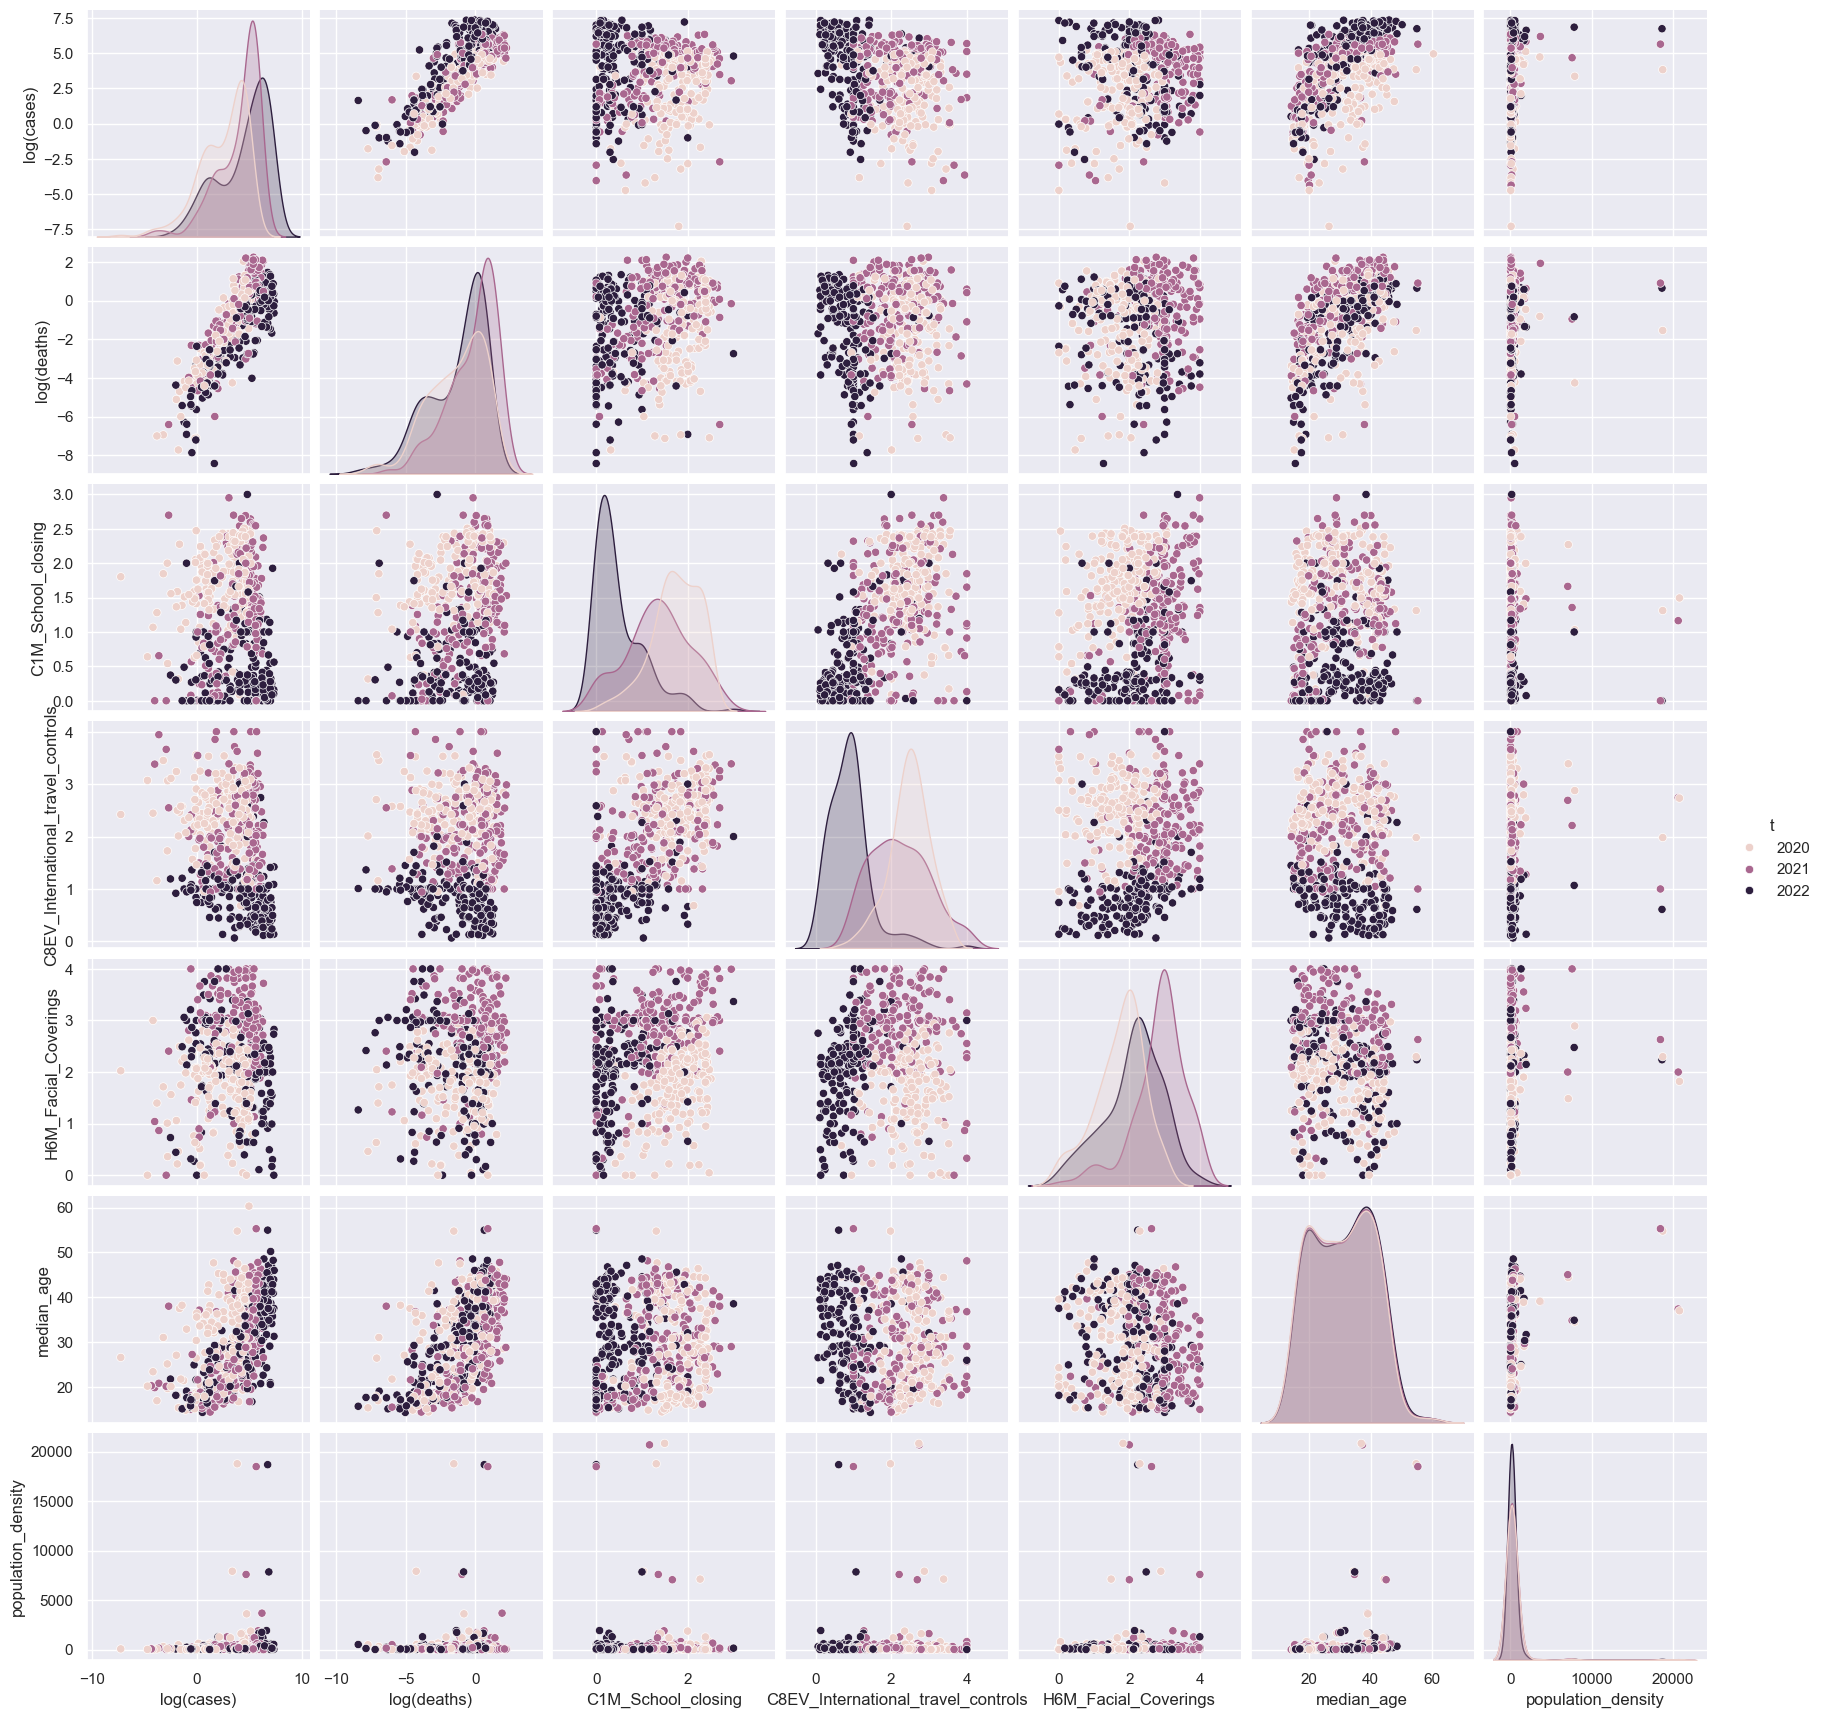

In [ ]:
sns.pairplot(regressors_df.to_pandas(),
             vars=['log(cases)', 'log(deaths)', 'C1M_School_closing', 
                    'C8EV_International_travel_controls', 'H6M_Facial_Coverings',
                    'median_age', 'population_density'], 
             hue='t')